### Programa de Estudios Superiores 2019-2020
### Programación I - proyecto final
#### Elaborado por <span class="alert alert-info"> ***Inserta tu nombre en este espacio*** </span><br>
***
***Instrucciones generales:*** resuelve el siguiente problema de acuerdo a la especificación dada. 
- El código debe ir comentado para explicar la lógica y debe ser totalmente funcional para ser considerado correcto. De lo contrario, la calificación podrá ser subjetiva.
- Al final de la definición de la clase, obtenga una instancia y muestra que el objeto se comporta de acuerdo a las especificaciones deseadas, para poder calificarte más rápidamente.
***

# Estimador de desviación estándar *leave-one-out (LOO)* 

Considere un conjunto de datos $(x_{1i}, \ldots, x_{6i})$ y $y_i$, donde $i = 1, \ldots, n$. A partir de este conjunto, es posible estimar el modelo de regresión lineal:

$$ y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i}+ \beta_4 x_{4i}+ \beta_5 x_{5i}+ \beta_6 x_{6i}$$ 

el cual puede expresarse en forma matricial como $y = X\beta$, donde $\beta$ corresponde al vector de parámetros del modelo.

En cierta ocasión, un profesor de econometría se encontraba estudiando nuevas formas de obtener estimadores para la varianza de los parámetros muestrales. Después de mucho pensar, este ingenioso profesor resulta con un método de estimación denominado *leave-one-out estimator* (estimador de "deja uno afuera") que consiste en un proceso iterativo con el conjunto de datos: 

1. Para cada $i$ en el conjunto de datos:  

    - Se elimina temporalmente la observación $i$ del conjunto para obtener el conjunto "modificado" $X_{-i}$.
    
    - Se estima el modelo de regresión lineal resultante $y^* = X_{-i}\beta$
    
    - Se guarda el resultado del parámetro $\beta^{(i)}$ de interés, donde $i$ denota que $\beta$ se estimó sin la observación $i$. 
    
2. Al final del proceso iterativo, se estima la desviación estándar del conjunto $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$ para obtener el estimador LOO del parámetro.

A continuación, se muestra una imagen representativa del proceso iterativo sobre el conjunto de datos. En cada iteración, se estima con las muestras en blanco y se elimina temporalmente la observación en gris.

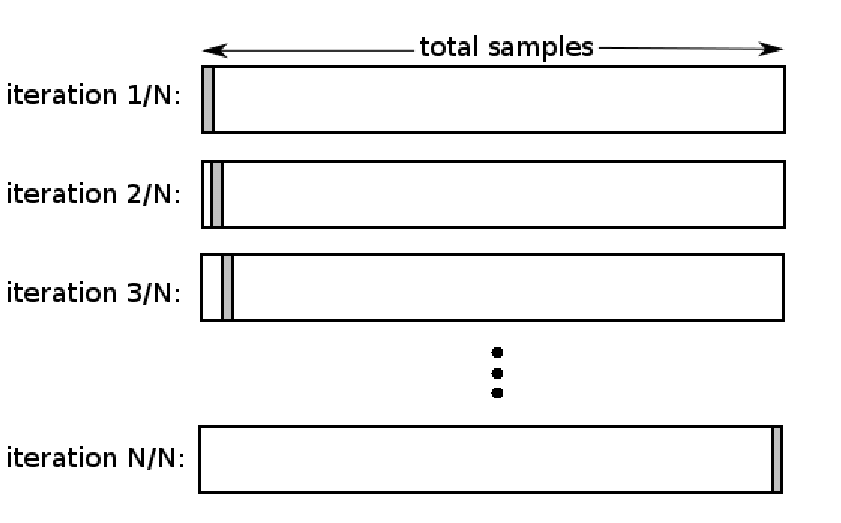 

Después de ocurrírsele este método al profesor, se dió cuenta que no sabía cómo llevar a cabo este proceso iterativo, ya que su habitual programa (software) de trabajo no permitía este tipo de procedimientos. Sin embargo, el profesor se recordó de su brillante amigo, que ha llevado recientemente un curso de programación en Python, y decide pedirle ayuda con esta tarea. Cuando el profesor contacta a su amigo, éste le dice que está muy cansado debido al curso que recién ha tomado, sin embargo, el profesor insiste en pedir su ayuda. 

Finalmente, después de recordar viejos tiempos y la invitación a un par de cervezas, el profesor logra convencer a su amigo de que lo ayude. Para esto, su amigo piensa resolver este problema a través de la implementación de una clase de Python. 

## Descripción de la clase

El amigo del profesor va a implementar la solución a través de la clase `looEstimation` de la siguiente forma:

- Al crear un objeto de esta clase, el constructor debe recibir el conjunto de datos `data`, cuya primera columna será de unos, luego estarán las variables $x$ y finalmente, la última columna corresponde a la variable $y$.

Además, deberá implementar los siguientes métodos:

- Método `estimate`, que lleve a cabo el proceso de estimación sobre una matriz $X$ y vector $y$ para estimar todos los parámetros del modelo, los cuales devolverá como un arreglo de numpy.

- Método `looSD`, que utilizará el método anterior sobre los datos guardados en el constructor y llevará a cabo el proceso iterativo $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$. Finalmente, devolverá la desviación estándar del conjunto de parámetros.
    - Se deben guardar los parámetros de cada iteración en alguna estructura (pandas o ndarray) para ser consumidos por los siguientes métodos.
    
- Método `plotDistribution`, que realizará una gráfica del histograma para cada uno de los diferentes parámetros del modelo.
    - Deberá agregar una opción booleana savePlots para escoger si guardar las gráficas en un formato de alta calidad (pdf, png).
    
- Método `getParameters`, que devolverá un `DataFrame` con los parámetros estimados en cada iteración del proceso.
    - Permite el parámetro booleano `saveCSV` para determinar si se debe guardar este `DataFrame` en un archivo CSV.

<div class="alert alert-info">
<b>Importe los paquetes que sean necesarios</b>: <br>


</div>

In [85]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-info">
<b>Escriba su código en la celda siguiente</b>: <br>


</div>

In [144]:
class looEstimation:
    ''' 
        Recibe el conjunto de datos `data`, cuya primera columna será 
        de unos, luego estarán las variables $x$ y finalmente, la última
        columna corresponde a la variable $y$.
    '''
    def __init__(self, data):
        self.X = data[:, :-1]
        self.y = data[:, -1].reshape(-1, 1)
    
    '''
        lleve a cabo el proceso de estimación sobre una matriz $X$ y 
        vector $y$ para estimar todos los parámetros del modelo, los 
        cuales devolverá como un arreglo de numpy
    '''
    def estimate(self, X, y):
        # Función para determinar los parámetros
        def mco(X, y):
            b = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
            return b
        
        return mco(X, y).T
    
    '''
        Utiliza el método estimate sobre los datos guardados en el constructor 
        y llevará a cabo el proceso iterativo. Se deben guardar los parámetros 
        de cada iteración en alguna estructura (pandas o ndarray) para 
        ser consumidos por los siguientes métodos.
    '''
    def looSD(self):
        # Filas y cantidad de parámetros
        n = self.X.shape[0]
        k = self.X.shape[1]
        betas = np.zeros((n, k))
        
        # Iterar sobre cada elemento de las filas
        for i in range(self.X.shape[0]):
            # Obtener las matrices quitando la fila i
            X_i = np.vstack((self.X[:i, :], self.X[i+1:, :]))
            y_i = np.vstack((self.y[:i, :], self.y[i+1:, :]))
            # Obtener las estimaciones
            beta_i = self.estimate(X_i, y_i)
            betas[i, :] = beta_i
        
        # Guardar los parámetros en una matriz
        self.looParams = betas
        # Guardar los parámetros en un pandas
        self.looParamsDF = pd.DataFrame(betas, \
                                        columns=['beta'+str(i) for i in range(k)])
        print("Procedimiento iterativo terminado.")
    
    '''
        Realiza una gráfica del histograma para cada uno de los diferentes
        parámetros del modelo. La opción booleana savePlots sirve para escoger 
        si guardar las gráficas en un formato de alta calidad (pdf, png).
    '''
    def plotDistribution(self, savePlots=False):
        # Graficar los betas en el pandas
        self.looParamsDF.hist(figsize=(15,20))
    
    '''
        Devuelve un `DataFrame` con los parámetros estimados en cada iteración 
        del proceso. Permite el parámetro booleano `saveCSV` para determinar si 
        se debe guardar este `DataFrame` en un archivo CSV.
    '''
    def getParameters(self, saveCSV=False):
        if saveCSV:
            self.looParamsDF.to_csv('parameters.csv')
        return self.looParamsDF

***
## Área de pruebas personal

Utilice el siguiente espacio para llevar a cabo **sus** pruebas.


In [64]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [3]:
# Se proporciona el archivo de datos para trabajar
# (1's, x1, x2, x3, x4, x5, x6, y)
data = np.load('data.npy')
data.shape

(50, 8)

In [5]:
data[:5, :-1]

array([[ 1.        , 16.        ,  1.        ,  3.        ,  5.71817495,
         5.74296768,  3.62430396],
       [ 1.        ,  5.        , 19.        ,  0.        ,  7.21603202,
         3.0513578 ,  9.01730965],
       [ 1.        , 11.        ,  3.        ,  5.        ,  5.35482202,
         0.52521593,  8.02328755],
       [ 1.        , 19.        , 18.        ,  0.        ,  1.503741  ,
         3.07021641,  9.53886385],
       [ 1.        , 19.        , 13.        ,  0.        ,  2.81754392,
         3.08919454,  0.48523719]])

In [6]:
data[:5, -1]

array([34.82125672, 44.80589205, 31.08735857, 37.99315444, 21.41242039])

In [12]:
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

In [13]:
X.shape

(50, 7)

In [14]:
y.shape

(50, 1)

In [37]:
X[:1, :]

array([[ 1.        , 16.        ,  1.        ,  3.        ,  5.71817495,
         5.74296768,  3.62430396]])

In [48]:
y[-2,:]

array([18.99464807])

In [50]:
np.vstack((y[:49, :], y[49+1:, :])).shape

(49, 1)

In [61]:
np.empty((1, 7))

array([[0.69171456, 0.28512965, 0.47337168, 0.67131171, 2.07406304,
        1.52740284, 1.733444  ]])

In [95]:
f = plt.figure(figsize=(14, 8))
f.axes

[]

<Figure size 1008x576 with 0 Axes>

In [145]:
obj = looEstimation(data)
obj.estimate(X, y)[0, :]

array([-0.69171456,  0.28512965,  0.47337168,  0.67131171,  2.07406304,
        1.52740284,  1.733444  ])

In [146]:
obj.looSD()

Procedimiento iterativo terminado.


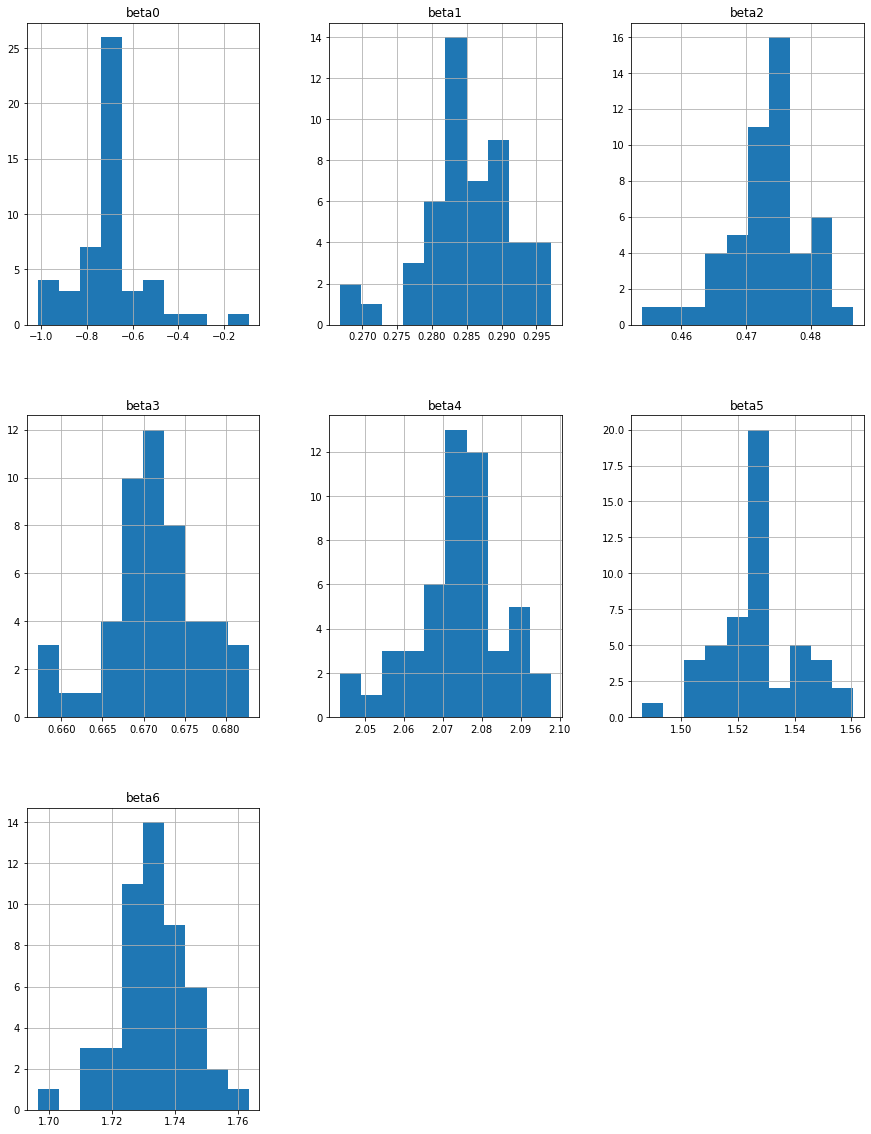

In [147]:
h = obj.plotDistribution()

In [148]:
param = obj.getParameters(saveCSV=True)
param

,beta0,beta1,beta2,beta3,beta4,beta5,beta6
0,-0.702714,0.278315,0.478967,0.675697,2.067953,1.516401,1.739092
1,-0.698253,0.284534,0.474676,0.670301,2.074688,1.528062,1.735125
2,-0.590825,0.288327,0.465322,0.669835,2.072428,1.502920,1.750307
3,-0.647169,0.282280,0.470738,0.672893,2.078596,1.525975,1.725817
4,-0.658312,0.289264,0.475731,0.668121,2.072907,1.530023,1.724441
5,-0.721540,0.279189,0.467120,0.669860,2.078013,1.557540,1.745207
6,-0.706823,0.284792,0.471340,0.671992,2.077216,1.529504,1.732786
7,-0.767779,0.281617,0.480149,0.677258,2.052744,1.528633,1.748310
8,-0.737695,0.281903,0.472836,0.678856,2.086542,1.505758,1.747097
9,-0.652552,0.282617,0.475535,0.673269,2.087501,1.521800,1.718642


***
## Área de pruebas para calificación

Utilice el siguiente espacio para mostrarnos su implementación terminada.

In [152]:
data.shape

(50, 8)

In [153]:
obj = looEstimation(data)

<div class="alert alert-info">
<b>Pruebe el método "estimate"</b>: <br>
</div>

In [154]:
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)
obj.estimate(X, y)

array([[-0.69171456,  0.28512965,  0.47337168,  0.67131171,  2.07406304,
         1.52740284,  1.733444  ]])

<div class="alert alert-info">
<b>Pruebe el método "looSD"</b>: <br>
</div>

In [155]:
obj.looSD()

Procedimiento iterativo terminado.


<div class="alert alert-info">
<b>Pruebe el método "plotDistribution"</b>: <br>
</div>

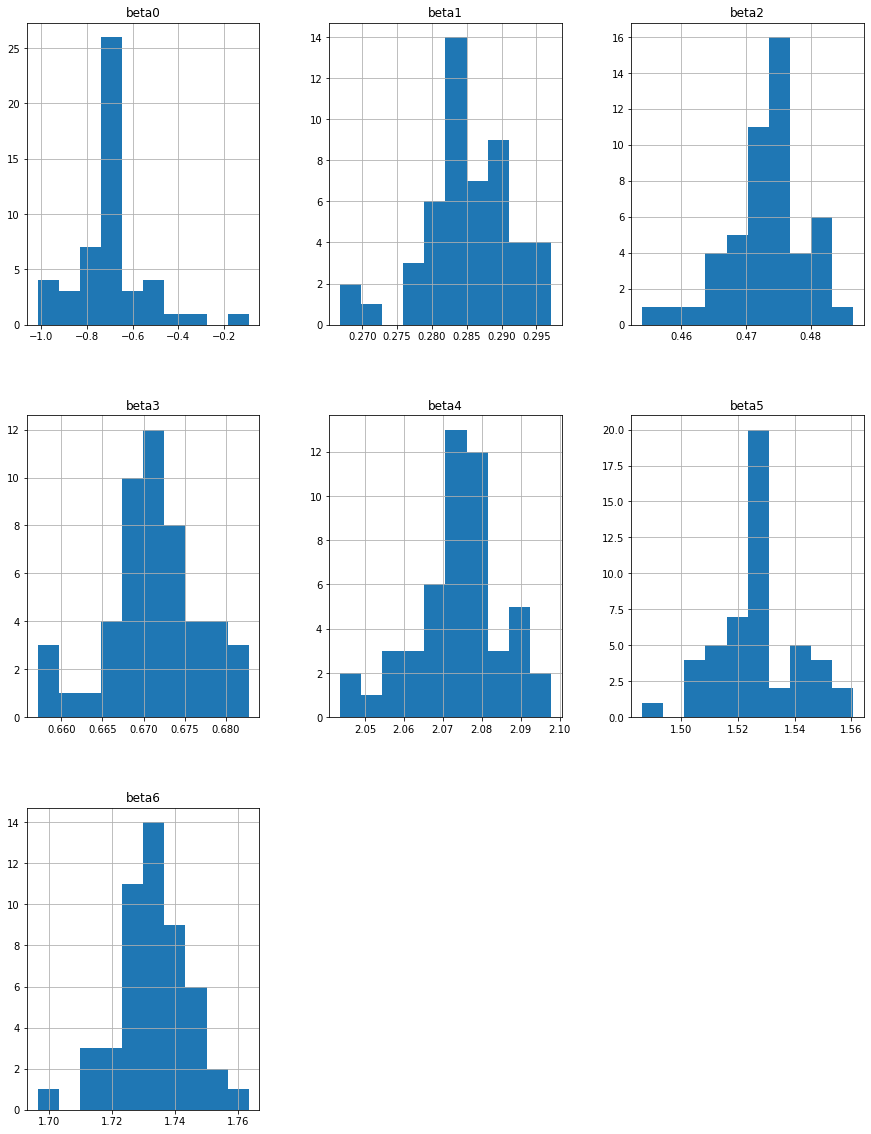

In [156]:
obj.plotDistribution()

<div class="alert alert-info">
<b>Pruebe el método "getParameters"</b>: <br>
</div>

In [157]:
obj.getParameters()

,beta0,beta1,beta2,beta3,beta4,beta5,beta6
0,-0.702714,0.278315,0.478967,0.675697,2.067953,1.516401,1.739092
1,-0.698253,0.284534,0.474676,0.670301,2.074688,1.528062,1.735125
2,-0.590825,0.288327,0.465322,0.669835,2.072428,1.502920,1.750307
3,-0.647169,0.282280,0.470738,0.672893,2.078596,1.525975,1.725817
4,-0.658312,0.289264,0.475731,0.668121,2.072907,1.530023,1.724441
5,-0.721540,0.279189,0.467120,0.669860,2.078013,1.557540,1.745207
6,-0.706823,0.284792,0.471340,0.671992,2.077216,1.529504,1.732786
7,-0.767779,0.281617,0.480149,0.677258,2.052744,1.528633,1.748310
8,-0.737695,0.281903,0.472836,0.678856,2.086542,1.505758,1.747097
9,-0.652552,0.282617,0.475535,0.673269,2.087501,1.521800,1.718642


<div class="alert alert-info">
<b>Muestre cada uno de los atribujos del objeto utilizado en el ejemplo</b>: <br>
</div>

In [158]:
obj.X

array([[1.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        5.71817495e+00, 5.74296768e+00, 3.62430396e+00],
       [1.00000000e+00, 5.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        7.21603202e+00, 3.05135780e+00, 9.01730965e+00],
       [1.00000000e+00, 1.10000000e+01, 3.00000000e+00, 5.00000000e+00,
        5.35482202e+00, 5.25215933e-01, 8.02328755e+00],
       [1.00000000e+00, 1.90000000e+01, 1.80000000e+01, 0.00000000e+00,
        1.50374100e+00, 3.07021641e+00, 9.53886385e+00],
       [1.00000000e+00, 1.90000000e+01, 1.30000000e+01, 0.00000000e+00,
        2.81754392e+00, 3.08919454e+00, 4.85237186e-01],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 1.10000000e+01,
        6.93762736e+00, 8.65858590e+00, 8.20375946e+00],
       [1.00000000e+00, 1.30000000e+01, 1.90000000e+01, 3.00000000e+00,
        1.52413420e+00, 6.58181466e-01, 4.70675807e+00],
       [1.00000000e+00, 1.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.66361272e+00, 3

In [159]:
obj.y

array([[34.82125672],
       [44.80589205],
       [31.08735857],
       [37.99315444],
       [21.41242039],
       [47.3197688 ],
       [26.7119935 ],
       [32.95108779],
       [47.69022077],
       [35.34568792],
       [45.11883709],
       [40.07752994],
       [22.12878336],
       [37.33331689],
       [40.72323415],
       [43.22083647],
       [29.71760437],
       [39.79408285],
       [45.29352448],
       [14.33655517],
       [33.4533468 ],
       [44.46526101],
       [18.44277459],
       [30.5968086 ],
       [41.19098272],
       [34.20199091],
       [30.63295535],
       [29.99844424],
       [45.96918599],
       [28.75448255],
       [38.9279507 ],
       [32.10801135],
       [13.39371941],
       [39.63161144],
       [57.12383568],
       [45.04025704],
       [30.47677385],
       [17.44466137],
       [44.69783568],
       [42.23580397],
       [21.57174446],
       [39.13058875],
       [36.78494408],
       [42.99411474],
       [48.99101108],
       [23

In [160]:
obj.looParams

array([[-0.70271448,  0.27831498,  0.47896714,  0.67569743,  2.06795334,
         1.51640107,  1.73909175],
       [-0.69825266,  0.2845345 ,  0.474676  ,  0.67030114,  2.07468817,
         1.52806186,  1.73512474],
       [-0.59082542,  0.28832672,  0.46532238,  0.66983526,  2.07242831,
         1.50291976,  1.75030682],
       [-0.64716941,  0.28227976,  0.47073752,  0.67289317,  2.07859644,
         1.52597541,  1.72581749],
       [-0.65831221,  0.28926363,  0.47573083,  0.66812134,  2.07290743,
         1.530023  ,  1.72444141],
       [-0.72153995,  0.27918892,  0.46711963,  0.66986009,  2.07801256,
         1.55753959,  1.74520716],
       [-0.70682282,  0.28479214,  0.47134   ,  0.67199235,  2.07721606,
         1.52950372,  1.73278555],
       [-0.76777866,  0.28161675,  0.48014939,  0.67725802,  2.0527445 ,
         1.52863318,  1.7483096 ],
       [-0.73769546,  0.28190301,  0.47283582,  0.67885626,  2.08654157,
         1.50575759,  1.74709664],
       [-0.65255226,  0.2826

In [161]:
obj.looParamsDF

,beta0,beta1,beta2,beta3,beta4,beta5,beta6
0,-0.702714,0.278315,0.478967,0.675697,2.067953,1.516401,1.739092
1,-0.698253,0.284534,0.474676,0.670301,2.074688,1.528062,1.735125
2,-0.590825,0.288327,0.465322,0.669835,2.072428,1.502920,1.750307
3,-0.647169,0.282280,0.470738,0.672893,2.078596,1.525975,1.725817
4,-0.658312,0.289264,0.475731,0.668121,2.072907,1.530023,1.724441
5,-0.721540,0.279189,0.467120,0.669860,2.078013,1.557540,1.745207
6,-0.706823,0.284792,0.471340,0.671992,2.077216,1.529504,1.732786
7,-0.767779,0.281617,0.480149,0.677258,2.052744,1.528633,1.748310
8,-0.737695,0.281903,0.472836,0.678856,2.086542,1.505758,1.747097
9,-0.652552,0.282617,0.475535,0.673269,2.087501,1.521800,1.718642
